## Exercise 19: A Decision Tree in scikit-learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

import graphviz

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-Projects-with-Python/master/Data/Chapter_1_cleaned_data.csv')


In [3]:
features_response = df.columns.tolist()
items_to_remove =  ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school','none', 'others', 'university']

In [4]:
features_response = [item for item in features_response if item not in items_to_remove]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import tree


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[features_response[:-1]].values, df['default payment next month'], test_size=0.3, random_state=0)

In [42]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [43]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features_response[:-1], class_names=['No', 'Yes'], filled=True, rounded=True, special_characters=True,proportion=True)

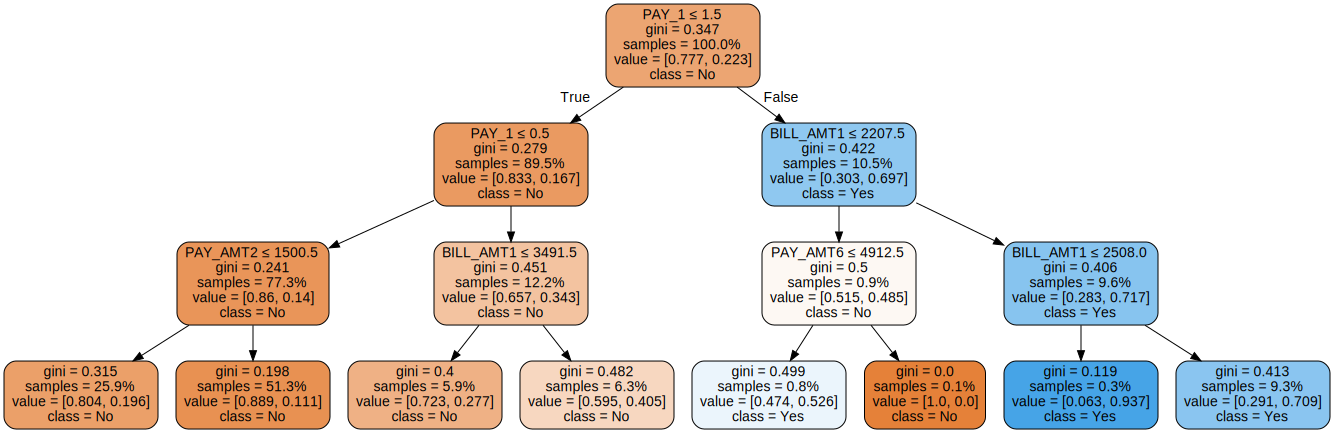

In [45]:
graph = graphviz.Source(dot_data)
graph

## Exercise 20: Finding Optimal Hyperparameters for a Decision Tree


In [53]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1,2,4,6,8,10,12]}
cv = GridSearchCV(clf, param_grid=params, scoring = 'roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1, pre_dispatch=None,
                  error_score=np.nan, return_train_score=True)

In [54]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [55]:
cv_results_df = pd.DataFrame(cv.cv_results_)

In [56]:
cv_results_df.sort_values(by='rank_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.027330,0.020323,0.039991,0.060563,1,{'max_depth': 1},0.638488,0.643760,0.651084,0.642130,0.643865,0.004584,7,0.645659,0.643901,0.641458,0.644444,0.643865,0.001529
6,0.152371,0.006783,0.000000,0.000000,12,{'max_depth': 12},0.668845,0.649358,0.662575,0.644456,0.656308,0.009813,6,0.890059,0.886041,0.898836,0.883923,0.889715,0.005709
5,0.127011,0.005625,0.000750,0.001299,10,{'max_depth': 10},0.697657,0.690331,0.701130,0.675854,0.691243,0.009703,5,0.849978,0.844847,0.849079,0.839985,0.845973,0.003963
1,0.040484,0.019478,0.008322,0.007355,2,{'max_depth': 2},0.694017,0.710380,0.704507,0.688353,0.699314,0.008626,4,0.701508,0.696072,0.698038,0.702864,0.699621,0.002701
4,0.106419,0.005153,0.000000,0.000000,8,{'max_depth': 8},0.721420,0.730052,0.725292,0.708509,0.721318,0.008002,3,0.811390,0.806430,0.805728,0.805111,0.807165,0.002484
2,0.060017,0.004300,0.000000,0.000000,4,{'max_depth': 4},0.723360,0.752827,0.751556,0.726670,0.738603,0.013646,2,0.755422,0.749997,0.748455,0.750569,0.751111,0.002607
3,0.090148,0.007750,0.004429,0.006520,6,{'max_depth': 6},0.730610,0.753522,0.748735,0.729790,0.740664,0.010604,1,0.782812,0.774244,0.770871,0.773894,0.775455,0.004445


Text(0, 0.5, 'ROC AUC')

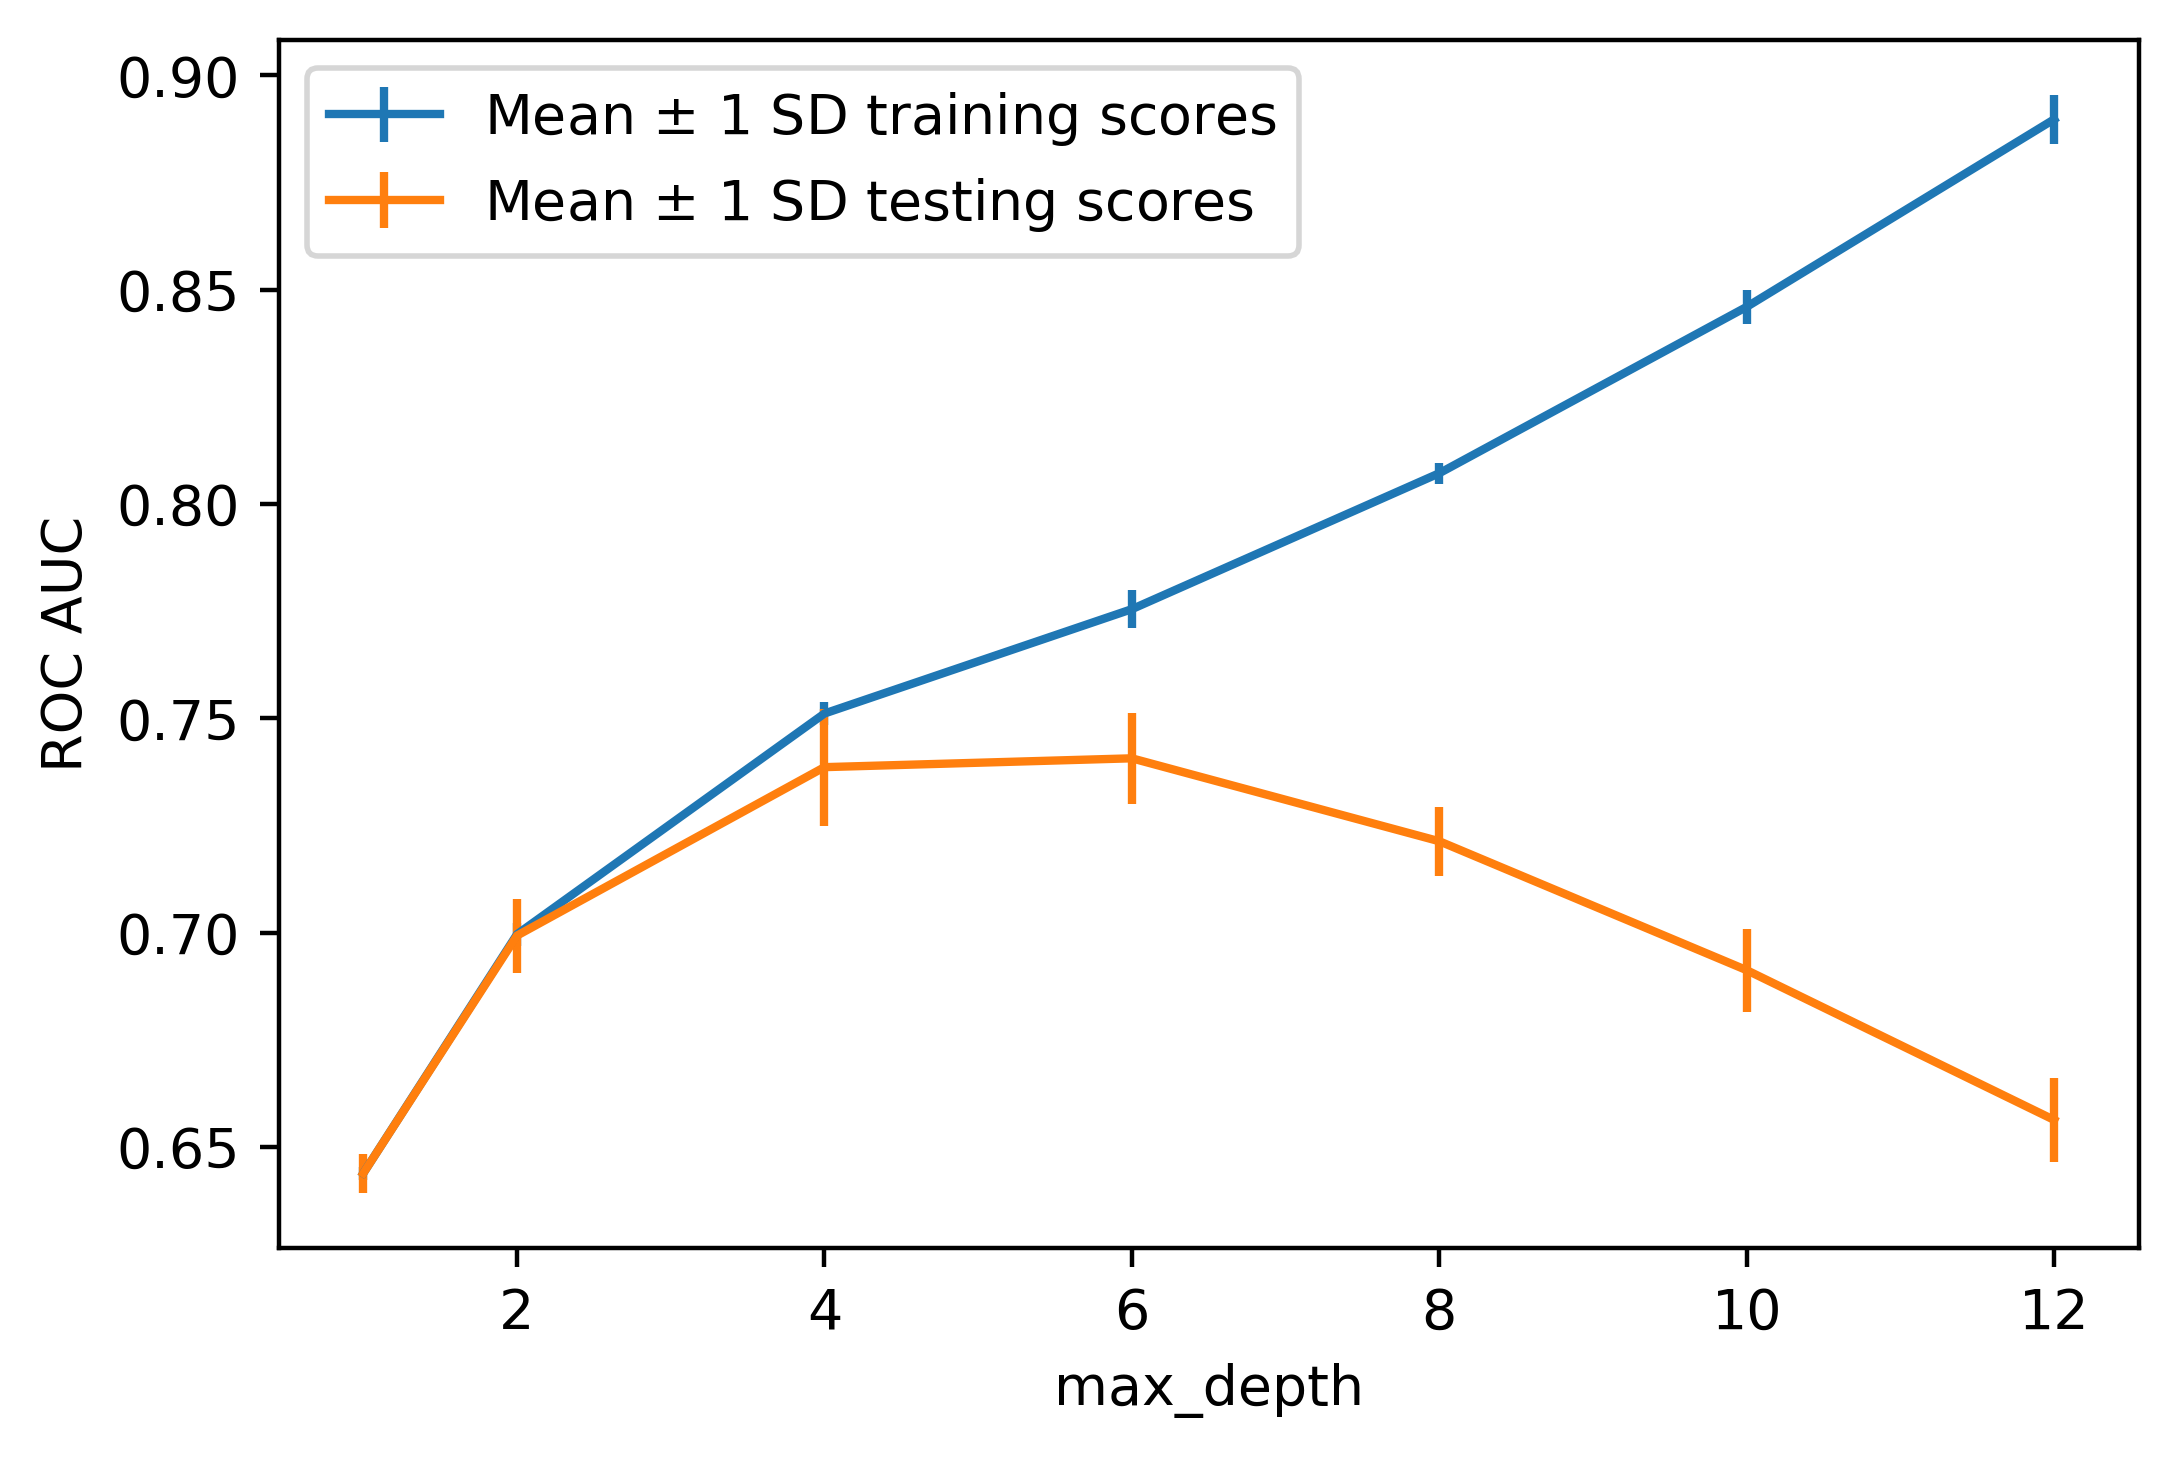

In [58]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
 cv_results_df['mean_train_score'],
 yerr=cv_results_df['std_train_score'],
 label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
 cv_results_df['mean_test_score'],
 yerr=cv_results_df['std_test_score'],
 label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')